In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
from custom import load_data as cf
from itertools import combinations

warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

* http://konect.uni-koblenz.de/networks/moreno_innovation

In [2]:
G = cf.load_physicians_network()

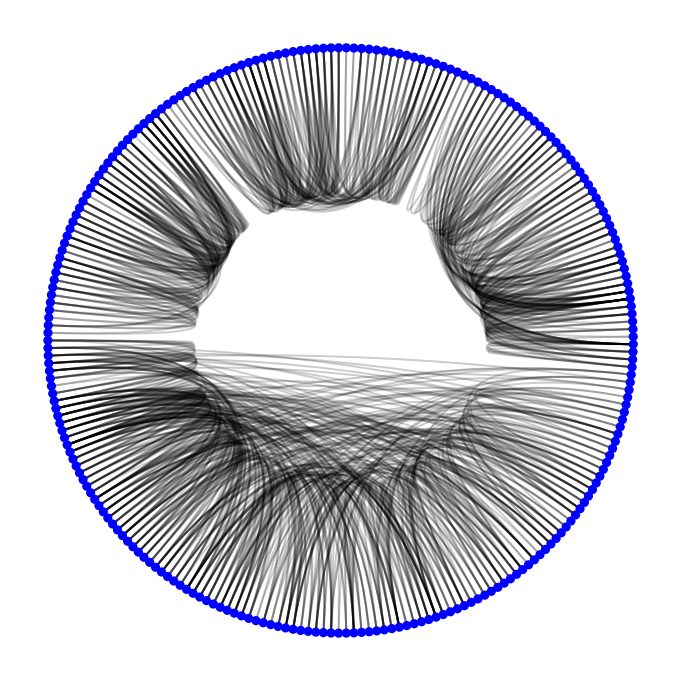

In [3]:
from nxviz import CircosPlot

c = CircosPlot(G)
c.draw()

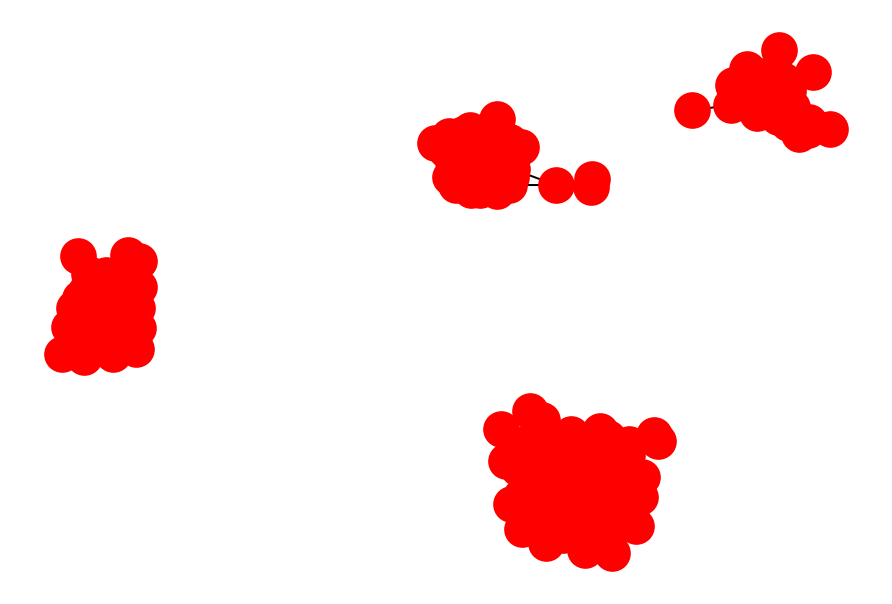

In [5]:
nx.draw(G)

* clique - set of nodes where every member of set is connected to every other set
* simplest clique - two nodes connected by an edge
* complex clique - three nodes all nodes connected to all
    - LinkedIn - friend recommender system - triangles which did not exist - is a node in triangle?

In [6]:
## Check if node is in triangle relationship

def in_triangle(G, node):
    for nbr1, nbr2 in combinations(G.neighbors(node), 2):
        if G.has_edge(nbr1, nbr2):
            return True
    return False

In [8]:
in_triangle(G, 3)

True

In [10]:
# Same function networkx function
nx.triangles(G, 3) #<- true

3

In [11]:
def get_triangles(G, node):
    neighbors1 = G.neighbors(node)
    triangles = set()
    triangles.add(node)
    
    for nbr1, nbr2 in combinations(neighbors1, 2):
        if(G.has_edge(nbr1, nbr2)):
            triangles.add(nbr1)
            triangles.add(nbr2)
    return(triangles)

In [13]:
get_tri = get_triangles(G, 3)
get_tri

{3, 9, 11, 41, 42, 67}

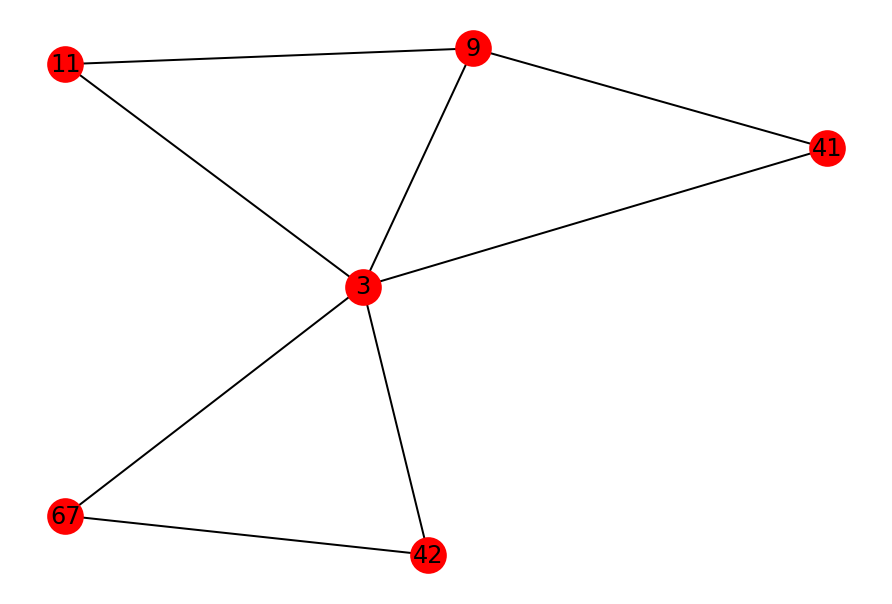

In [14]:
nx.draw(G.subgraph(get_triangles(G,3)), with_labels = True)

# Friend recommendations

- open triangle - triadic closure - A knows B, B knows C. Recommend A to C.

In [20]:
def get_open_triangles(G, node):
    open_tri = []
    
    neighbor1 = G.neighbors(node)
    
    for nbr1, nbr2 in combinations(neighbor1, 2):
        if not G.has_edge(nbr1, nbr2):
            open_tri.append([nbr1, node, nbr2])
    return(open_tri)
    

In [21]:
get_open_triangles(G, 3)

[[1, 3, 9],
 [1, 3, 101],
 [1, 3, 67],
 [1, 3, 41],
 [1, 3, 11],
 [1, 3, 42],
 [1, 3, 112],
 [1, 3, 91],
 [9, 3, 101],
 [9, 3, 67],
 [9, 3, 42],
 [9, 3, 112],
 [9, 3, 91],
 [101, 3, 67],
 [101, 3, 41],
 [101, 3, 11],
 [101, 3, 42],
 [101, 3, 112],
 [101, 3, 91],
 [67, 3, 41],
 [67, 3, 11],
 [67, 3, 112],
 [67, 3, 91],
 [41, 3, 11],
 [41, 3, 42],
 [41, 3, 112],
 [41, 3, 91],
 [11, 3, 42],
 [11, 3, 112],
 [11, 3, 91],
 [42, 3, 112],
 [42, 3, 91],
 [112, 3, 91]]

* complicated scenario:
    - We have if node is middle node in open triangle
    - what if our node is terminal node? - check if my neighbor's neighbor is my neighbor

### Maximal clique

- maximal clique - cannot add another node that we can expand any further
- every clique of size k can be decomposed to clique of size k-1


In [22]:
list(nx.find_cliques(G))[:20]

[[1, 2],
 [1, 3],
 [1, 4, 5, 6],
 [1, 7],
 [1, 72],
 [2, 41],
 [2, 10],
 [2, 11, 40],
 [2, 11, 39],
 [2, 42, 110],
 [3, 67, 42],
 [3, 101],
 [3, 9, 41],
 [3, 9, 11],
 [3, 112],
 [3, 91],
 [4, 6, 32],
 [4, 6, 109],
 [4, 104],
 [4, 74, 116]]

In [26]:
def maximal_clique_find(G, size):
    cli = list(nx.find_cliques(G))
    
    return([c for c in cli if len(c) >= size])

In [28]:
maximal_clique_find(G, 5)

[[13, 15, 18, 74, 14],
 [15, 23, 54, 40, 37],
 [20, 25, 21, 117, 95],
 [127, 121, 132, 128, 129],
 [127, 121, 132, 125, 142],
 [168, 194, 197, 203, 179],
 [207, 209, 208, 210, 211],
 [208, 210, 228, 225, 220, 216],
 [208, 210, 228, 225, 220, 209, 221],
 [208, 210, 228, 227, 216],
 [208, 210, 228, 211, 216],
 [208, 210, 228, 211, 209],
 [208, 210, 223, 216, 211],
 [208, 210, 223, 216, 220],
 [208, 210, 223, 221, 220],
 [208, 226, 209, 220, 221],
 [209, 217, 221, 220, 225, 228],
 [209, 217, 221, 220, 226],
 [210, 219, 220, 228, 221],
 [217, 219, 220, 221, 226],
 [217, 219, 220, 221, 228],
 [219, 226, 224, 220, 221]]

## Connected component

In [31]:
ccgraph = list(nx.connected_component_subgraphs(G))

In [32]:
for i, g in enumerate(ccgraph):
    for n in g.nodes():
        G.node[n]['subgraph'] = i

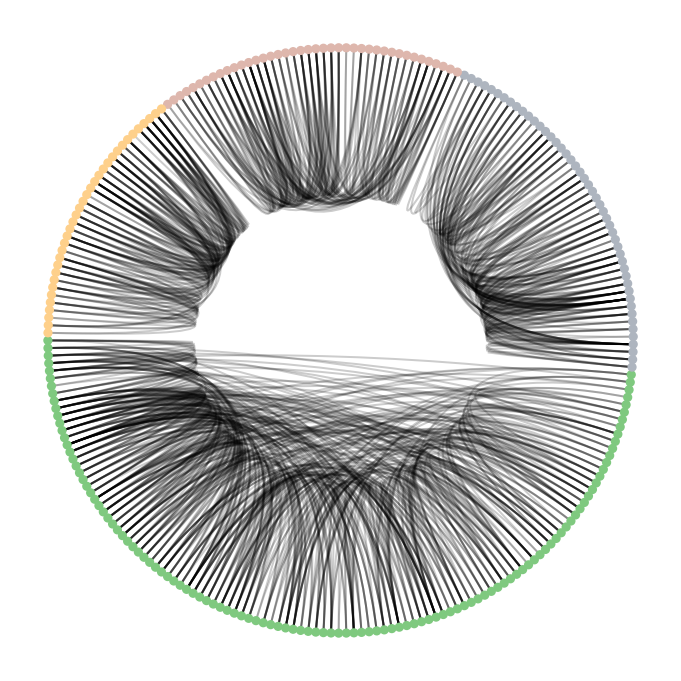

In [38]:
c = CircosPlot(G, node_color='subgraph', node_order='subgraph')
c.draw()

In [3]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2),(1,3),(1,8),(2,3),(2,8),(2,6),(2,5),(2,4),(3,7),(4,5),(4,6),(5,6), (6,7)])

In [5]:
list(nx.enumerate_all_cliques(G))

[[1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [1, 2],
 [1, 3],
 [1, 8],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 8],
 [3, 7],
 [4, 5],
 [4, 6],
 [5, 6],
 [6, 7],
 [1, 2, 3],
 [1, 2, 8],
 [2, 4, 5],
 [2, 4, 6],
 [2, 5, 6],
 [4, 5, 6],
 [2, 4, 5, 6]]